In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import os
from math import factorial
import statsmodels.formula.api as smf

In [20]:
df = pd.read_csv('./Data Files/fish.csv', header=None, names=['fist', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'label'])
df = df.loc[:, df.columns!='fist']
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,label
0,242.0,23.2,25.4,30.0,38.4,13.4,0
1,290.0,24.0,26.3,31.2,40.0,13.8,0
2,340.0,23.9,26.5,31.1,39.8,15.1,0
3,363.0,26.3,29.0,33.5,38.0,13.3,0
4,430.0,26.5,29.0,34.0,36.6,15.1,0


In [21]:
feature = df.iloc[:, :-1].values
label = df.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(feature, label, test_size=0.15, random_state=37)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(72, 6)
(72,)
(13, 6)
(13,)


In [22]:
def col_row(matrix):
    number = range(matrix.shape[0])
    list_ = np.zeros((factorial(matrix.shape[1]),matrix.shape[0]+1))
    
    count_ = 0
    for x0 in number:
        y0 = list(filter(lambda x: x!=x0, number))
        for x1 in y0:
            y1 = list(filter(lambda x: x!=x1, y0))
            for x2 in y1:
                y2 = list(filter(lambda x: x!=x2, y1))
                for x3 in y2:                    
                    list_[count_, 0] = x0
                    list_[count_, 1] = x1
                    list_[count_, 2] = x2
                    list_[count_, 3] = x3
                    count_ += 1

    for row in range(list_.shape[0]):
        sum_ = 0
        for col in range(list_.shape[1]-1):
            sum_ += matrix.iloc[col, int(list_[row, col])]
        list_[row, -1] = sum_
    
    max_ = list_[np.argmax(list_[:,-1]),:]
    
    dict_ = {}
    for i in range(max_.shape[0] - 1):
        dict_[int(max_[i])] = int(i)
    return dict_

col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10
50.588235294117645


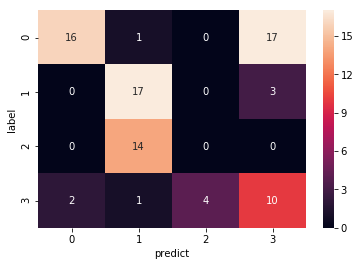

In [23]:
#Kmean not scaler
kmean = KMeans(n_clusters = df['label'].nunique(), random_state=17)
kmean.fit(feature)

y_pre1 = kmean.labels_
table1 = pd.DataFrame({'actual': label, 'predict': y_pre1})
table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

matrix_predict1 = pd.crosstab(label, y_pre1)
print(matrix_predict1)

print(100*np.trace(matrix_predict1)/df.shape[0])

convert_ = col_row(matrix_predict1)
print(convert_)

table1['predict'] = table1['predict'].map(convert_)
table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

matrix_convert1 = pd.crosstab(label, table1['predict'])
print(matrix_convert1)

sns.heatmap(matrix_convert1, annot=True)
print(100*np.trace(matrix_convert1)/df.shape[0])

col_0   0  1   2  3
label              
0       5  6  23  0
1      20  0   0  0
2      14  0   0  0
3       5  2   7  3
9.411764705882353
{2: 0, 0: 1, 1: 2, 3: 3}
predict   0   1  2  3
label                
0        23   5  6  0
1         0  20  0  0
2         0  14  0  0
3         7   5  2  3
54.11764705882353


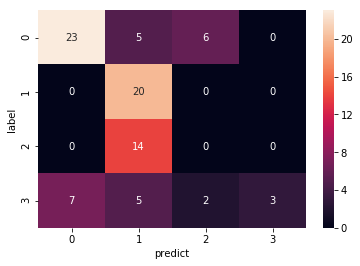

In [24]:
#Hierarchical not scaler
hierarchical = AgglomerativeClustering(n_clusters = df['label'].nunique())
hierarchical.fit(feature)

y_pre2 = hierarchical.labels_
table2 = pd.DataFrame({'actual': label, 'predict': y_pre2})
table2['Result'] = np.where(table2['actual']==table2['predict'], True, False) 

matrix_predict2 = pd.crosstab(label, y_pre2)
print(matrix_predict2)

print(100*np.trace(matrix_predict2)/df.shape[0])

convert_ = col_row(matrix_predict2)
print(convert_)

table2['predict'] = table2['predict'].replace(convert_)
table2['Result'] = np.where(table2['actual']==table2['predict'], True, False) 

matrix_convert2 = pd.crosstab(label, table2['predict'])
print(matrix_convert2)

sns.heatmap(matrix_convert2, annot=True)
print(100*np.trace(matrix_convert2)/df.shape[0])

Hierarchical is better than KMean when not scaler

In [25]:
standardscaler = StandardScaler()
feature_std = standardscaler.fit_transform(feature)

minmaxscaler = MinMaxScaler()
feature_minmax = minmaxscaler.fit_transform(feature)

col_0   0   1   2   3
label                
0      33   0   0   1
1       1   0   0  19
2       0  13   0   1
3       0   0  17   0
38.8235294117647
{0: 0, 3: 1, 1: 2, 2: 3}
predict   0   1   2   3
label                  
0        33   1   0   0
1         1  19   0   0
2         0   1  13   0
3         0   0   0  17
96.47058823529412


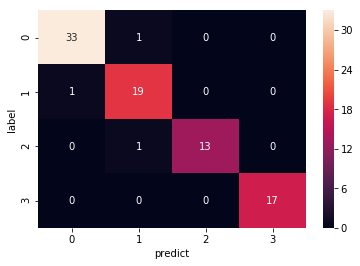

In [26]:
#Kmean standardscaler
kmean = KMeans(n_clusters = df['label'].nunique(), random_state=17)
kmean.fit(feature_std)

y_pre1 = kmean.labels_
table1 = pd.DataFrame({'actual': label, 'predict': y_pre1})
table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

matrix_predict1 = pd.crosstab(label, y_pre1)
print(matrix_predict1)

print(100*np.trace(matrix_predict1)/df.shape[0])

convert_ = col_row(matrix_predict1)
print(convert_)

table1['predict'] = table1['predict'].replace(convert_)
table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

matrix_convert1 = pd.crosstab(label, table1['predict'])
print(matrix_convert1)

sns.heatmap(matrix_convert1, annot=True)
print(100*np.trace(matrix_convert1)/df.shape[0])

col_0   0   1   2   3
label                
0      34   0   0   0
1       0   0  20   0
2       0   0   1  13
3       0  17   0   0
41.1764705882353
{0: 0, 2: 1, 3: 2, 1: 3}
predict   0   1   2   3
label                  
0        34   0   0   0
1         0  20   0   0
2         0   1  13   0
3         0   0   0  17
98.82352941176471


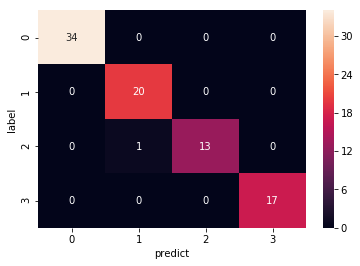

In [27]:
#Kmean minmaxscaler
kmean = KMeans(n_clusters = df['label'].nunique(), random_state=17)
kmean.fit(feature_minmax)

y_pre1 = kmean.labels_
table1 = pd.DataFrame({'actual': label, 'predict': y_pre1})
table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

matrix_predict1 = pd.crosstab(label, y_pre1)
print(matrix_predict1)

print(100*np.trace(matrix_predict1)/df.shape[0])

convert_ = col_row(matrix_predict1)
print(convert_)

table1['predict'] = table1['predict'].replace(convert_)
table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

matrix_convert1 = pd.crosstab(label, table1['predict'])
print(matrix_convert1)

sns.heatmap(matrix_convert1, annot=True)
print(100*np.trace(matrix_convert1)/df.shape[0])

col_0   0   1   2   3
label                
0       0   0  34   0
1       0   1   0  19
2       0  14   0   0
3      17   0   0   0
1.1764705882352942
{2: 0, 3: 1, 1: 2, 0: 3}
predict   0   1   2   3
label                  
0        34   0   0   0
1         0  19   1   0
2         0   0  14   0
3         0   0   0  17
98.82352941176471


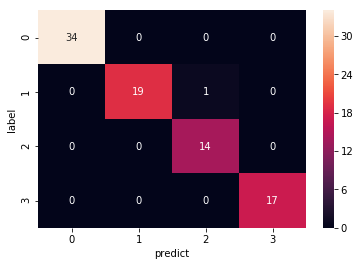

In [28]:
#Hierarchical standardscaler
hierarchical = AgglomerativeClustering(n_clusters = df['label'].nunique())
hierarchical.fit(feature_std)

y_pre2 = hierarchical.labels_
table2 = pd.DataFrame({'actual': label, 'predict': y_pre2})
table2['Result'] = np.where(table2['actual']==table2['predict'], True, False) 

matrix_predict2 = pd.crosstab(label, y_pre2)
print(matrix_predict2)

print(100*np.trace(matrix_predict2)/df.shape[0])

convert_ = col_row(matrix_predict2)
print(convert_)

table2['predict'] = table2['predict'].replace(convert_)
table2['Result'] = np.where(table2['actual']==table2['predict'], True, False) 

matrix_convert2 = pd.crosstab(label, table2['predict'])
print(matrix_convert2)

sns.heatmap(matrix_convert2, annot=True)
print(100*np.trace(matrix_convert2)/df.shape[0])

col_0   0   1   2   3
label                
0       0   0  34   0
1       0   0   0  20
2       0  14   0   0
3      17   0   0   0
0.0
{2: 0, 3: 1, 1: 2, 0: 3}
predict   0   1   2   3
label                  
0        34   0   0   0
1         0  20   0   0
2         0   0  14   0
3         0   0   0  17
100.0


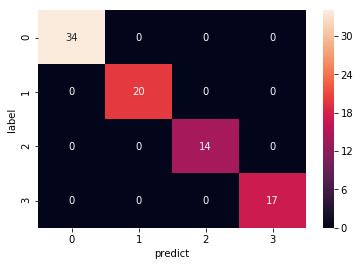

In [29]:
#Hierarchical minmaxscaler
hierarchical = AgglomerativeClustering(n_clusters = df['label'].nunique())
hierarchical.fit(feature_minmax)

y_pre2 = hierarchical.labels_
table2 = pd.DataFrame({'actual': label, 'predict': y_pre2})
table2['Result'] = np.where(table2['actual']==table2['predict'], True, False) 

matrix_predict2 = pd.crosstab(label, y_pre2)
print(matrix_predict2)

print(100*np.trace(matrix_predict2)/df.shape[0])

convert_ = col_row(matrix_predict2)
print(convert_)

table2['predict'] = table2['predict'].replace(convert_)
table2['Result'] = np.where(table2['actual']==table2['predict'], True, False) 

matrix_convert2 = pd.crosstab(label, table2['predict'])
print(matrix_convert2)

sns.heatmap(matrix_convert2, annot=True)
print(100*np.trace(matrix_convert2)/df.shape[0])

Hierarchical minmaxscaler have ratio 100%

Decomposition: 1 

feature_pca: (85, 1)
col_0   0   1   2  3
label               
0       1  16  17  0
1      17   0   3  0
2      14   0   0  0
3       1   2  10  4
5.882352941176471
{1: 0, 0: 1, 3: 2, 2: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


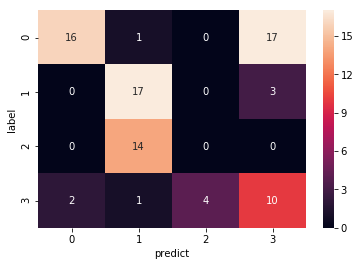

50.588235294117645
--------------------------------------------------
Decomposition: 2 

feature_pca: (85, 2)
col_0   0   1   2  3
label               
0       1  16  17  0
1      17   0   3  0
2      14   0   0  0
3       1   2  10  4
5.882352941176471
{1: 0, 0: 1, 3: 2, 2: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


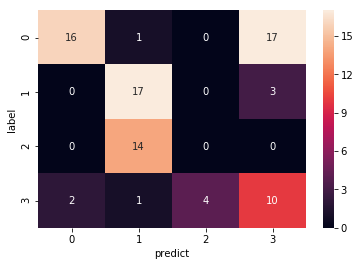

50.588235294117645
--------------------------------------------------
Decomposition: 3 

feature_pca: (85, 3)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


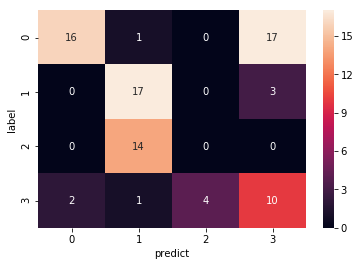

50.588235294117645
--------------------------------------------------
Decomposition: 4 

feature_pca: (85, 4)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


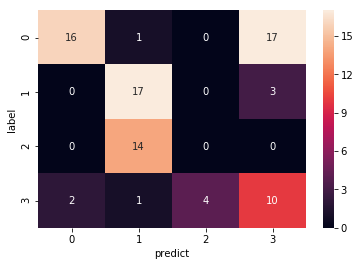

50.588235294117645
--------------------------------------------------
Decomposition: 5 

feature_pca: (85, 5)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


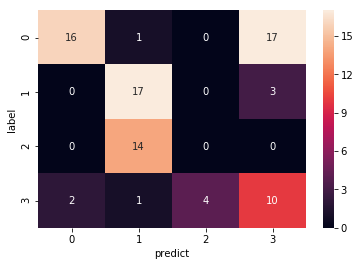

50.588235294117645
--------------------------------------------------


In [30]:
#pca
Decomposition = []
accuracy = []
for decomposition in range(1, feature.shape[1]):
    Decomposition.append(decomposition)
    pca = PCA(n_components=decomposition)
    feature_pca = pca.fit_transform(feature)
    print('Decomposition:', decomposition, '\n')
    print('feature_pca:', feature_pca.shape)
    
    kmean = KMeans(n_clusters = df['label'].nunique(), random_state=17)
    kmean.fit(feature_pca)

    y_pre1 = kmean.labels_
    table1 = pd.DataFrame({'actual': label, 'predict': y_pre1})
    table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

    matrix_predict1 = pd.crosstab(label, y_pre1)
    print(matrix_predict1)

    print(100*np.trace(matrix_predict1)/df.shape[0])

    convert_ = col_row(matrix_predict1)
    print(convert_)

    table1['predict'] = table1['predict'].replace(convert_)
    table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

    matrix_convert1 = pd.crosstab(label, table1['predict'])
    print(matrix_convert1)

    sns.heatmap(matrix_convert1, annot=True)
    plt.show()
    acc = 100*np.trace(matrix_convert1)/df.shape[0]
    print(acc)
    print('-'*50)
    
    accuracy.append(acc)

PCA in not scaler is estimating 50%

[1, 2, 3, 4, 5]
[50.588235294117645, 50.588235294117645, 50.588235294117645, 50.588235294117645, 50.588235294117645]


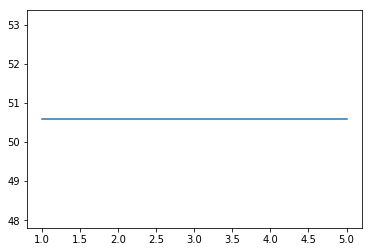

In [31]:
plt.plot(Decomposition, accuracy)
print(Decomposition)
print(accuracy)

PCA not affect to accuracy

Decomposition: 1 

feature_pca: (85, 5)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


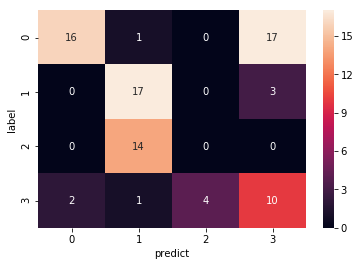

50.588235294117645
--------------------------------------------------
Decomposition: 2 

feature_pca: (85, 5)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


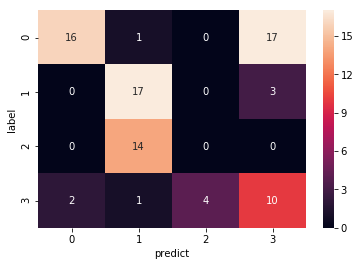

50.588235294117645
--------------------------------------------------
Decomposition: 3 

feature_pca: (85, 5)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


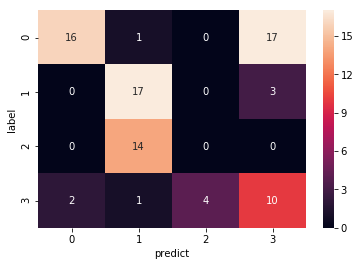

50.588235294117645
--------------------------------------------------
Decomposition: 4 

feature_pca: (85, 5)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


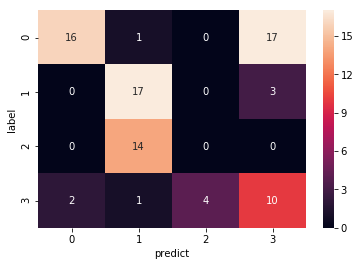

50.588235294117645
--------------------------------------------------
Decomposition: 5 

feature_pca: (85, 5)
col_0   0   1   2  3
label               
0      17  16   1  0
1       3   0  17  0
2       0   0  14  0
3      10   2   1  4
41.1764705882353
{1: 0, 2: 1, 3: 2, 0: 3}
predict   0   1  2   3
label                 
0        16   1  0  17
1         0  17  0   3
2         0  14  0   0
3         2   1  4  10


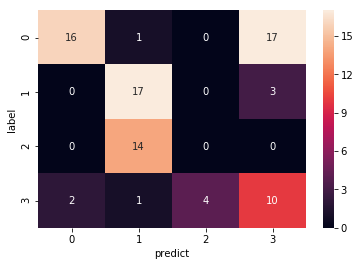

50.588235294117645
--------------------------------------------------


In [32]:
#pca
Decomposition = []
accuracy = []
for decomposition in range(1, feature.shape[1]):
    Decomposition.append(decomposition)
    pca = PCA(n_components=decomposition)
    feature_pca_std = pca.fit_transform(feature_std)
    print('Decomposition:', decomposition, '\n')
    print('feature_pca:', feature_pca.shape)
    
    kmean = KMeans(n_clusters = df['label'].nunique(), random_state=17)
    kmean.fit(feature_pca)

    y_pre1 = kmean.labels_
    table1 = pd.DataFrame({'actual': label, 'predict': y_pre1})
    table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

    matrix_predict1 = pd.crosstab(label, y_pre1)
    print(matrix_predict1)

    print(100*np.trace(matrix_predict1)/df.shape[0])

    convert_ = col_row(matrix_predict1)
    print(convert_)

    table1['predict'] = table1['predict'].replace(convert_)
    table1['Result'] = np.where(table1['actual']==table1['predict'], True, False) 

    matrix_convert1 = pd.crosstab(label, table1['predict'])
    print(matrix_convert1)

    sns.heatmap(matrix_convert1, annot=True)
    plt.show()
    acc = 100*np.trace(matrix_convert1)/df.shape[0]
    print(acc)
    print('-'*50)
    
    accuracy.append(acc)

[1, 2, 3, 4, 5]
[50.588235294117645, 50.588235294117645, 50.588235294117645, 50.588235294117645, 50.588235294117645]


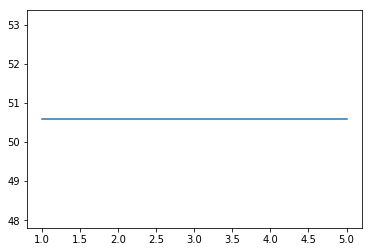

In [33]:
plt.plot(Decomposition, accuracy)
print(Decomposition)
print(accuracy)

In [34]:
sns.pairplot()

TypeError: pairplot() missing 1 required positional argument: 'data'